<a href="https://colab.research.google.com/github/AlexKI123/Challenge-FinSeriesPredict/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/input_training.csv', index_col=0)
train_data_y = pd.read_csv('/content/drive/MyDrive/output_training_gmEd6Zt.csv', index_col=0)

# Merge the input and output data on the 'ID' column
merged_data = train_data.merge(train_data_y, left_index=True, right_index=True)

# Drop the 'day' and 'equity' columns from the DataFrame
merged_data = merged_data.drop(['day', 'equity'], axis=1)

# Map labels from [-1, 0, 1] to [0, 1, 2]
label_mapping = {-1: 0, 0: 1, 1: 2}
merged_data['reod'] = merged_data['reod'].map(label_mapping)

print(merged_data.head())

        r0      r1     r2     r3     r4     r5     r6     r7     r8     r9  \
ID                                                                           
0     0.00     NaN    NaN    NaN   0.00    NaN    NaN -68.03 -34.25    NaN   
1    -9.76    0.00 -12.21  46.44  34.08   0.00  41.24  12.08 -26.54  19.32   
2    49.85    0.00   0.00 -26.64 -23.66 -22.14  49.12  53.61  -4.70 -28.27   
3     0.00     NaN   0.00   0.00   0.00    NaN    NaN    NaN   0.00    NaN   
4  -123.84 -115.18 -26.44   0.00  42.42  10.56   0.00 -47.57  21.28 -10.63   

    ...    r44    r45    r46    r47   r48    r49    r50    r51    r52  reod  
ID  ...                                                                      
0   ...   0.00    NaN   0.00    NaN  0.00    NaN    NaN    NaN   0.00     1  
1   ... -16.92  -4.84   4.84   0.00  7.26  -9.68 -19.38   9.71  26.68     1  
2   ...   1.59   6.37 -49.32  -9.59 -6.40  22.41  -6.39   7.99  15.96     0  
3   ...    NaN    NaN    NaN    NaN   NaN    NaN    NaN   0.00 

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = merged_data.drop(['reod'], axis=1)
y = merged_data['reod']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Predicting the Test set results
y_pred = xgb_clf.predict(X_test)

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

              precision    recall  f1-score   support

           0       0.42      0.35      0.39    203078
           1       0.54      0.72      0.61    277949
           2       0.42      0.29      0.34    193613

    accuracy                           0.48    674640
   macro avg       0.46      0.45      0.45    674640
weighted avg       0.47      0.48      0.47    674640

[[ 71911  86953  44214]
 [ 44465 199091  34393]
 [ 53490  84096  56027]]
Test Accuracy: 0.4847459385746472


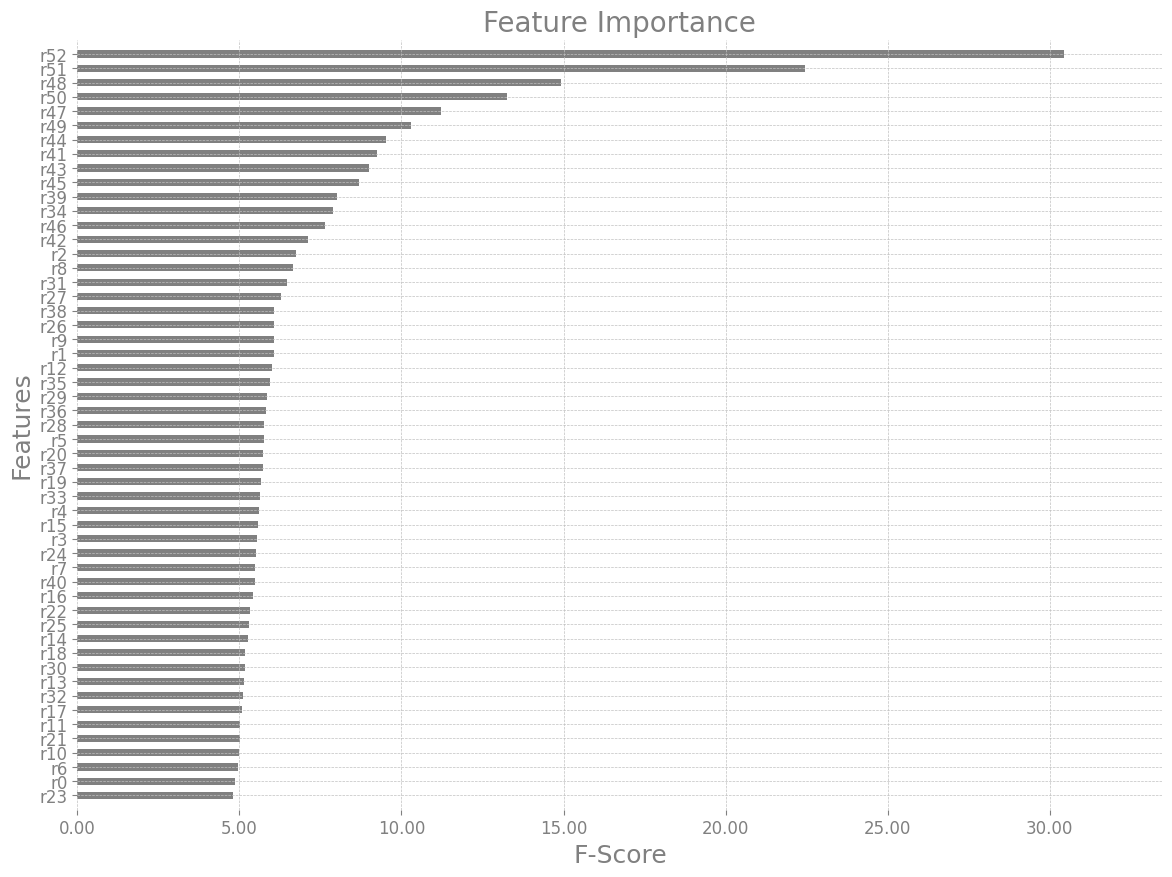

In [6]:
import matplotlib.pyplot as plt
import xgboost as xgb
from matplotlib.ticker import FormatStrFormatter

# Assuming xgb_clf is your trained XGBoost model
plt.rcParams["figure.figsize"] = (14, 10)
ax = xgb.plot_importance(xgb_clf, height=0.5, color='gray', importance_type='gain', show_values=False)

# Customize the plot to match a sleek and modern design
ax.set_title('Feature Importance', fontsize=20, fontweight='light', color='gray')
ax.set_xlabel('F-Score', fontsize=18, fontweight='light', color='gray')
ax.set_ylabel('Features', fontsize=18, fontweight='light', color='gray')
ax.tick_params(axis='x', colors='gray', labelsize=12)
ax.tick_params(axis='y', colors='gray', labelsize=12)

# Customize the grid
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='silver')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Removing the box frame by hiding all spines for a minimalist design
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()
